<a href="https://colab.research.google.com/github/rakeshkaduduri/Machine-Learning/blob/main/Day_19(07_01_2026)(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Example dataset: Study Hours vs Pass/Fail (Binary Classification)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]) # Study Hours
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 0 = fail, 1 = Pass

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# Classifcation
print("\n Classification REport:\nclassification_report(y_test, y_pred)")
print("Classification Report:\n ", classification_report(y_test, y_pred))

In [ ]:
# Generate values for plotting
x_range = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1] # Get probability of class 1

# Plot
plt.scatter(X, y, color = "red", label = "Actual Data")
plt.plot(x_range, y_prob, color = "blue", label = "Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Pass/Fail")
plt.title("Logistic Regression - Study Hours vs Pass/Fail")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusiion Matrix:\n", cm)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    cmap = "Blues", values_format = "d"
)

plt.title("Confusion Matrix")
plt.show()


# Task 1 (heart.csv)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/heart.csv'
df = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: xlabel='target', ylabel='count'>

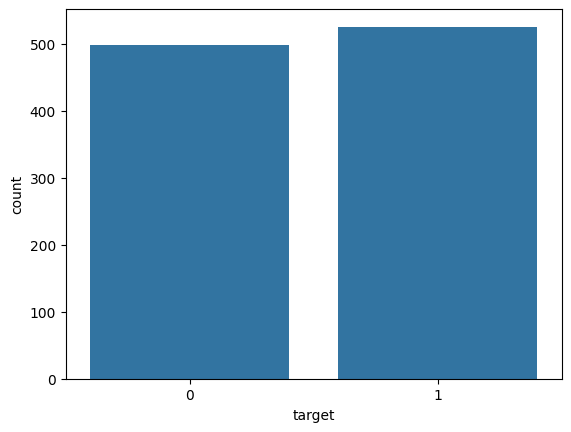

In [ ]:
sns.countplot(x=df['target'])

In [ ]:
x=df.drop('target',axis=1)
y=df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Predictions:",y_pred)

Predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
print("Accuracy:",accuracy_score(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.7951219512195122
Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



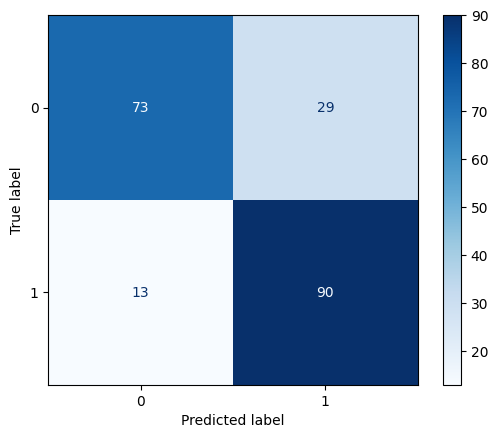

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues',values_format='d')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


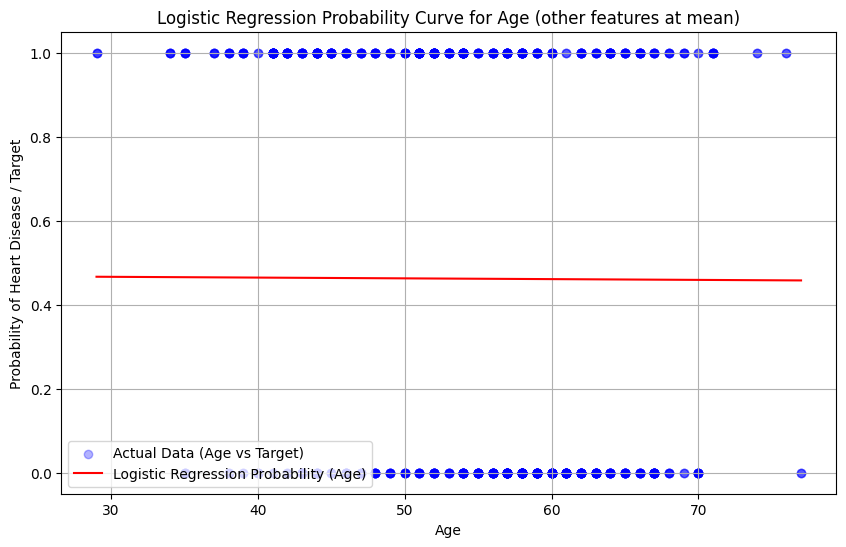

In [ ]:
import matplotlib.pyplot as plt

# 1. Get the means of the features from the original unscaled training data (`x`).
x_means = x.mean().values.reshape(1, -1)

# 2. Create a synthetic array with 1000 samples, initially setting all features to their mean.
X_synthetic = np.tile(x_means, (1000, 1))

# 3. Identify the index of the 'age' column.
age_col_idx = x.columns.get_loc('age')

# 4. Generate a range for the 'age' feature based on its min and max values in the original data.
age_min = x['age'].min()
age_max = x['age'].max()
age_range = np.linspace(age_min, age_max, 1000).reshape(-1, 1)

# 5. Replace the 'age' column in the synthetic dataset with the generated age_range.
X_synthetic[:, age_col_idx] = age_range.flatten()

# 6. Scale the synthetic dataset using the previously fitted scaler.
#    The `scaler` object was fitted on `X_train` in a previous cell.
X_synthetic_scaled = scaler.transform(X_synthetic)

# 7. Predict probabilities using the model.
y_prob = model.predict_proba(X_synthetic_scaled)[:, -1]

# 8. Plot the actual 'age' vs 'target' data and the probability curve.
plt.figure(figsize=(10, 6))
plt.scatter(x['age'], y, alpha=0.3, label='Actual Data (Age vs Target)', color='blue')
plt.plot(age_range, y_prob, color='red', label='Logistic Regression Probability (Age)')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease / Target')
plt.title('Logistic Regression Probability Curve for Age (other features at mean)')
plt.legend()
plt.grid(True)
plt.show()